# Chap. 3

***
## Chap. 3-1

### 3-1-2

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas import Series, DataFrame
from sklearn import linear_model
%matplotlib inline
%precision 3

'%.3f'

***
## Chap. 3-2

### 3-2-1

#### 3-2-1-2

In [2]:
cd ~/Notebooks/u-tokyo/chap3/

/Users/me/Notebooks/u-tokyo/chap3


> Unixコマンドが実行できる。ただし，１セルにつき１コマンドのみ。

In [3]:
pwd

'/Users/me/Notebooks/u-tokyo/chap3'

#### 3-2-1-5

In [4]:
ls -la

total 1240
drwxr-xr-x  7 me  staff     224  8 15 21:39 ./
drwxr-xr-x  5 me  staff     160  8 14 21:54 ../
drwxr-xr-x  3 me  staff      96  8 14 23:34 .ipynb_checkpoints/
-rw-r--r--  1 me  staff  477429  8 15 21:39 chap3.ipynb
-rw-r--r--  1 me  staff   56993  8 14 23:33 student-mat.csv
-rw-r--r--  1 me  staff   93220  8 14 23:32 student-por.csv
-rw-r--r--  1 me  staff    3206  8 15 14:44 student.txt


### 3-2-2

#### 3-2-2-1

In [5]:
student_data_math = pd.read_csv('student-mat.csv')

#### 3-2-2-2

In [6]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [7]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [8]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
student_data_math.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


### 3-2-3

#### 3-2-3-1

In [10]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### 3-2-4

#### 3-2-4-1

In [11]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

> これは質的データ。

In [12]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

> これは量的データ。

#### 3-2-4-2

In [13]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

In [14]:
student_data_math.groupby('sex')['age'].std()

sex
F    1.201696
M    1.356181
Name: age, dtype: float64

In [15]:
student_data_math.groupby('sex')['G1'].mean()

sex
F    10.620192
M    11.229947
Name: G1, dtype: float64

In [16]:
student_data_math.groupby('sex')['G1'].std()

sex
F    3.232530
M    3.392839
Name: G1, dtype: float64

In [17]:
student_data_math.groupby('sex')['G2'].mean()

sex
F    10.389423
M    11.074866
Name: G2, dtype: float64

In [18]:
student_data_math.groupby('sex')['G2'].std()

sex
F    3.641851
M    3.868088
Name: G2, dtype: float64

In [19]:
student_data_math.groupby('sex')['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

In [20]:
student_data_math.groupby('sex')['G3'].std()

sex
F    4.622338
M    4.495297
Name: G3, dtype: float64

In [21]:
student_data_math.groupby(['Mjob','Fjob'])['absences'].mean()

Mjob      Fjob    
at_home   at_home     1.857143
          health      8.000000
          other       5.515152
          services    4.000000
          teacher     3.000000
health    health      4.166667
          other       6.000000
          services    2.200000
          teacher     6.000000
other     at_home     5.800000
          health      6.000000
          other       5.721154
          services    8.708333
          teacher     4.166667
services  at_home     7.333333
          health      5.750000
          other       6.785714
          services    5.302326
          teacher     5.000000
teacher   at_home     3.500000
          health      6.000000
          other       4.809524
          services    7.000000
          teacher     5.666667
Name: absences, dtype: float64

***
## Chap. 3-3

### 3-3-1

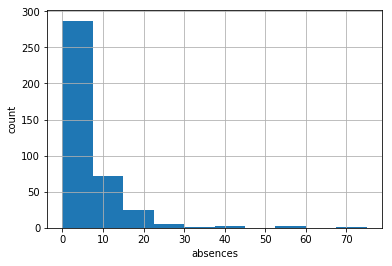

In [22]:
plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid()

In [23]:
print(f'欠席の平均値：{student_data_math["absences"].mean()}')
print(f'欠席の中央値：{student_data_math["absences"].median()}')
print(f'欠席の最頻値：{student_data_math["absences"].mode()}')      

欠席の平均値：5.708860759493671
欠席の中央値：4.0
欠席の最頻値：0    0
dtype: int64


> 注意！  
`print(f'欠席の平均値：{student_data_math['absences'].mean()}')`   
等，f-strings中の`'absences'`というような**シングルクォーテーションではエラーが出る**ので`"absences"`というように**ダブルクォーテーションにしておくこと**。

### 3-3-3

In [24]:
student_data_math['absences'].var()

64.050

In [25]:
student_data_math['absences'].std()

8.003

In [26]:
(student_data_math['absences'].std())**2

64.050

In [27]:
np.sqrt(student_data_math['absences'].var())

8.003095687108177

### 3-3-4

In [28]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

#### 3-3-4-1

In [29]:
q1q3 = student_data_math['absences'].describe()['75%']-student_data_math['absences'].describe()['25%']

> Seriesにindexが付いているので，上記のように求めることができる。

In [30]:
print(f'四分位範囲：{q1q3}')

四分位範囲：8.0


#### 3-3-4-2

In [31]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 3-3-5

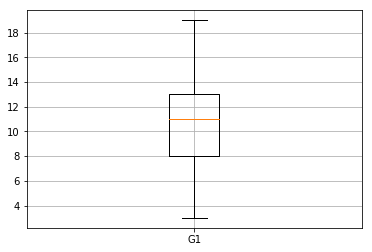

In [32]:
plt.boxplot(student_data_math['G1'], labels=['G1'])
plt.grid()

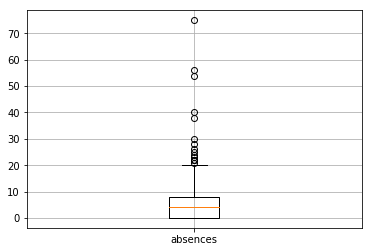

In [33]:
plt.boxplot(student_data_math['absences'], labels=['absences'])
plt.grid()

In [34]:
student_data_math['absences'][
    student_data_math['absences']>student_data_math['absences'].describe()['75%']+q1q3*1.5
].sort_values()[::-1]

276    75
183    56
74     54
315    40
307    38
280    30
205    28
103    26
40     25
198    24
320    23
313    22
277    22
216    22
260    21
Name: absences, dtype: int64

> `'absences'`の（上）外れ値は上記の通り。

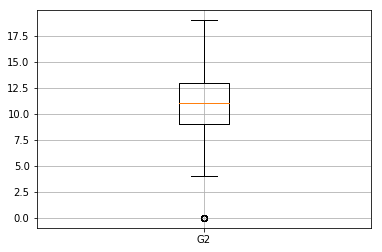

In [35]:
plt.boxplot(student_data_math['G2'], labels=['G2'])
plt.grid()

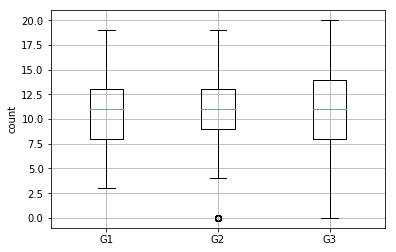

In [36]:
plt.boxplot([student_data_math['G1'],student_data_math['G2'],student_data_math['G3']],
            labels=['G1','G2','G3'])
plt.ylabel('count')
plt.grid()

### 3-3-6

In [37]:
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

In [38]:
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

### 3-3-7

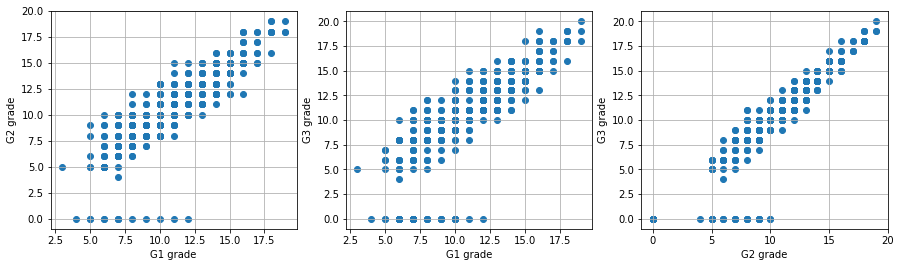

In [39]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(
    student_data_math['G1'], student_data_math['G2'])
plt.xlabel('G1 grade')
plt.ylabel('G2 grade')
plt.grid()

plt.subplot(1,3,2)
plt.scatter(
    student_data_math['G1'], student_data_math['G3'])
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid()

plt.subplot(1,3,3)
plt.scatter(
    student_data_math['G2'], student_data_math['G3'])
plt.xlabel('G2 grade')
plt.ylabel('G3 grade')
plt.grid()

#### 3-3-7-1

In [40]:
grade = ['G1', 'G2', 'G3']
for i in grade:
    for j in grade:
        if i == j:
            continue
        print(f'co-var of {i} and {j} :\n{np.cov(student_data_math[i], student_data_math[j])}')
        print()

co-var of G1 and G2 :
[[11.017 10.639]
 [10.639 14.149]]

co-var of G1 and G3 :
[[11.017 12.188]
 [12.188 20.99 ]]

co-var of G2 and G1 :
[[14.149 10.639]
 [10.639 11.017]]

co-var of G2 and G3 :
[[14.149 15.594]
 [15.594 20.99 ]]

co-var of G3 and G1 :
[[20.99  12.188]
 [12.188 11.017]]

co-var of G3 and G2 :
[[20.99  15.594]
 [15.594 14.149]]



In [41]:
for i in grade:
    print(f'var of {i}: {student_data_math[i].var()}')

var of G1: 11.017053267364899
var of G2: 14.148917303861756
var of G3: 20.989616397866737


#### 3-3-7-2

In [42]:
print(sp.stats.pearsonr(student_data_math['G1'], student_data_math['G2']))
print(sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3']))
print(sp.stats.pearsonr(student_data_math['G2'], student_data_math['G3']))

(0.8521180663648062, 1.441346685428264e-112)
(0.8014679320174141, 9.001430312276602e-90)
(0.9048679892693012, 7.62571915404493e-148)


In [43]:
print(np.corrcoef(student_data_math['G1'], student_data_math['G2']))
print(np.corrcoef(student_data_math['G1'], student_data_math['G3']))
print(np.corrcoef(student_data_math['G2'], student_data_math['G3']))

[[1.    0.852]
 [0.852 1.   ]]
[[1.    0.801]
 [0.801 1.   ]]
[[1.    0.905]
 [0.905 1.   ]]


### 3-3-8

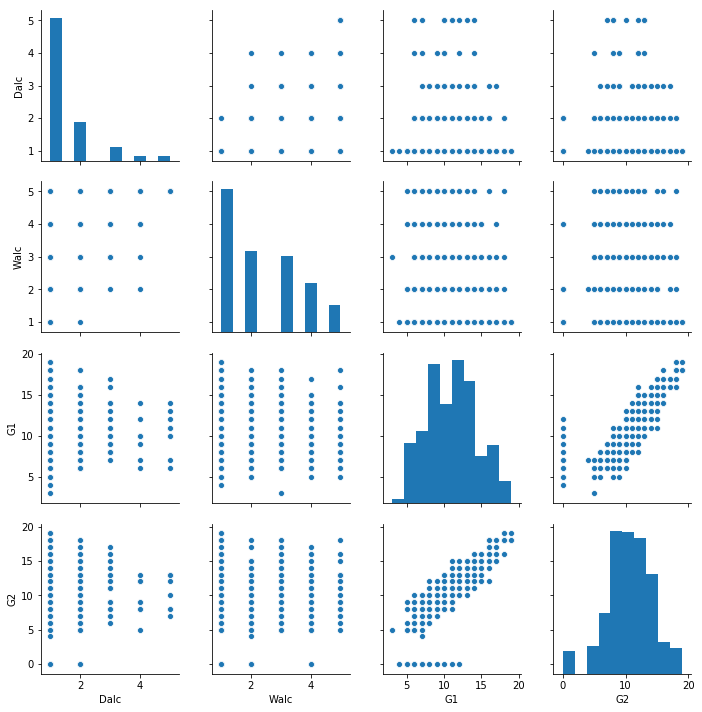

In [44]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G2']])

***
#### Pactice 3-1

In [45]:
ls

chap3.ipynb      student-mat.csv  student-por.csv  student.txt


In [46]:
student_data_por = pd.read_csv('student-por.csv', sep=';')

In [47]:
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [48]:
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


***
#### Practice 3-2

In [49]:
student_data_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [50]:
student_data_merge = pd.merge(student_data_math, student_data_por,
                              on=['school','sex','age','address','famsize','Pstatus',
                                  'Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                              suffixes=['_math', '_por'])

> キーとする項目名を`on=[...]`で共通化し，重複項目名を`suffixes=[...]`で分離する。

In [51]:
student_data_merge.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [52]:
student_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 53 columns):
school             382 non-null object
sex                382 non-null object
age                382 non-null int64
address            382 non-null object
famsize            382 non-null object
Pstatus            382 non-null object
Medu               382 non-null int64
Fedu               382 non-null int64
Mjob               382 non-null object
Fjob               382 non-null object
reason             382 non-null object
guardian_math      382 non-null object
traveltime_math    382 non-null int64
studytime_math     382 non-null int64
failures_math      382 non-null int64
schoolsup_math     382 non-null object
famsup_math        382 non-null object
paid_math          382 non-null object
activities_math    382 non-null object
nursery            382 non-null object
higher_math        382 non-null object
internet           382 non-null object
romantic_math      382 non-null object
famr

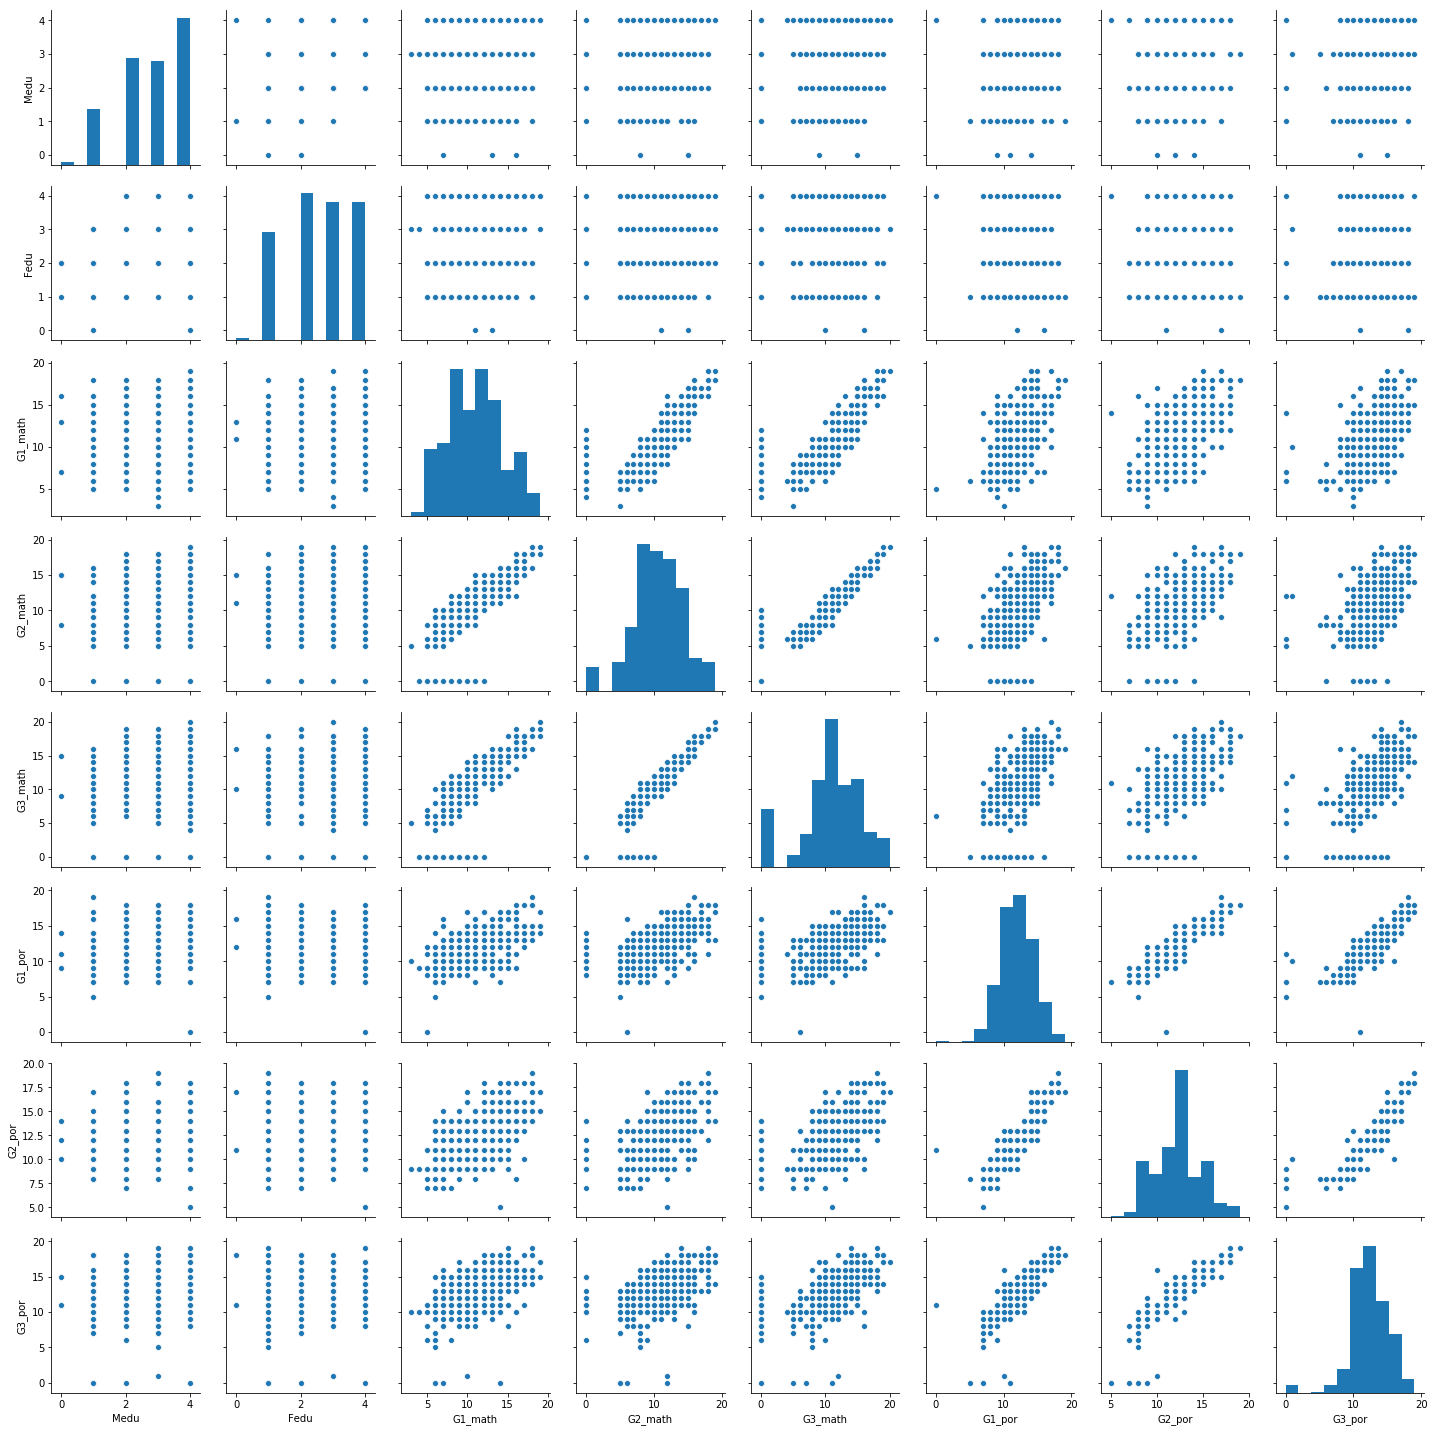

In [53]:
sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por', 'G3_por']])

***
## Chap. 3-4

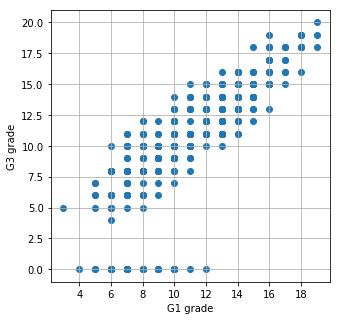

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(
    student_data_math['G1'], student_data_math['G3'])
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid()

### 3-4-1

In [55]:
reg = linear_model.LinearRegression()

In [56]:
X = student_data_math['G1'].values
X = np.array([X]).T
Y = student_data_math['G3'].values
reg.fit(X,Y)
print(f'回帰係数：{reg.coef_}')
print(f'切片：{reg.intercept_}')

回帰係数：[1.106]
切片：-1.6528038288004616


> 説明変数を**列ベクトル**，目的変数を**行ベクトル**にシテおく仕様。

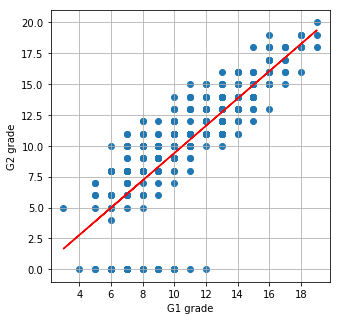

In [57]:
plt.figure(figsize=(5,5))

plt.scatter(X,Y)
plt.xlabel('G1 grade')
plt.ylabel('G2 grade')

plt.plot(X, reg.predict(X), c="red")

plt.grid()

### 3-4-2

In [58]:
print(f'決定係数：{reg.score(X, Y)}')

決定係数：0.64235084605227


***
#### Practice 3-4

In [59]:
reg_por = linear_model.LinearRegression()

X_por = np.array([student_data_por['G1'].values]).T
Y_por = student_data_por['G3'].values

reg_por.fit(X_por, Y_por)

print(f'回帰係数：{reg_por.coef_}')
print(f'切片：{reg_por.intercept_}')
print(f'決定係数：{reg_por.score(X_por, Y_por)}')

回帰係数：[0.973]
切片：0.8203984121064565
決定係数：0.6829156800171085


***
#### Practice 3-5

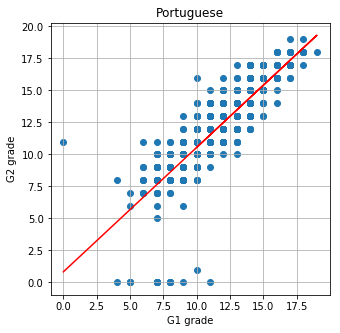

In [60]:
plt.figure(figsize=(5,5))

plt.scatter(X_por,Y_por)
plt.title('Portuguese')
plt.xlabel('G1 grade')
plt.ylabel('G2 grade')

plt.plot(X_por, reg_por.predict(X_por), c="red")

plt.grid()

In [61]:
reg_por2 = linear_model.LinearRegression()

X_por2 = np.array([student_data_por['absences'].values]).T
Y_por2 = student_data_por['G3'].values

reg_por2.fit(X_por2, Y_por2)

print(f'回帰係数：{reg_por2.coef_}')
print(f'切片：{reg_por2.intercept_}')
print(f'決定係数：{reg_por2.score(X_por2, Y_por2)}')

回帰係数：[-0.064]
切片：12.138800862687443
決定係数：0.008350131955637385


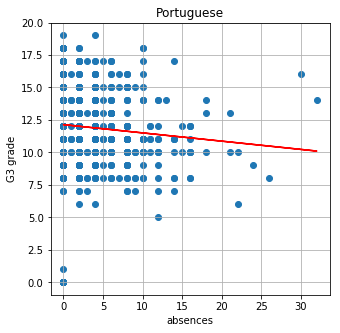

In [62]:
plt.figure(figsize=(5,5))

plt.scatter(X_por2, Y_por2)
plt.title('Portuguese')
plt.xlabel('absences')
plt.ylabel('G3 grade')

plt.plot(X_por2, reg_por2.predict(X_por2), c="red")

plt.grid()